In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import os
import cv2



from keras.callbacks import EarlyStopping
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_dataset = train_datagen.flow_from_directory('train dataset', 
                                          target_size= (640, 640), 
                                          batch_size = 60,
                                          class_mode = 'categorical')
validation_dataset = validation_datagen.flow_from_directory('validation dataset', 
                                          target_size= (640,640),
                                          batch_size = 60,
                                          class_mode = 'categorical')

Found 3600 images belonging to 6 classes.
Found 1550 images belonging to 6 classes.


In [6]:
batch_images, batch_labels = train_dataset[0]
print("Batch of Images Shape:", batch_images.shape)
print("Batch of Labels Shape:", batch_labels.shape)

Batch of Images Shape: (60, 640, 640, 3)
Batch of Labels Shape: (60, 6)


In [4]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape=(640,640,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),

                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),

                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),

                                    tf.keras.layers.Conv2D(128,(2,2), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    
                                    tf.keras.layers.Conv2D(256,(2,2), activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),



                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation= 'relu',kernel_regularizer=regularizers.l2(0.01)),
                                    Dropout(0.45),
                                    tf.keras.layers.Dense(6, activation= 'softmax',kernel_regularizer=regularizers.l2(0.01))  
                                   ]
                                  )

In [5]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=0.001,
                              patience =8,
                              verbose = 1,
                              mode='auto',
                              restore_best_weights=True,
                              start_from_epoch=5
                             )

In [6]:
lr_schedule = ReduceLROnPlateau(factor=0.5, patience=3)

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer =Adam(learning_rate=0.001),
              metrics= ['accuracy']
             )

In [9]:
model_fit= model.fit(train_dataset, 
                     epochs=100,
                     validation_data= validation_dataset, 
                     callbacks=[early_stopping,lr_schedule]
                    )

Epoch 1/100
60/60 [==============================] - 401s 7s/step - loss: 25.0938 - accuracy: 0.2744 - val_loss: 17.8303 - val_accuracy: 0.1561 - lr: 0.0010
Epoch 2/100
60/60 [==============================] - 399s 7s/step - loss: 19.6995 - accuracy: 0.3231 - val_loss: 12.8249 - val_accuracy: 0.1916 - lr: 0.0010
Epoch 3/100
60/60 [==============================] - 397s 7s/step - loss: 13.6146 - accuracy: 0.3558 - val_loss: 10.9240 - val_accuracy: 0.1884 - lr: 0.0010
Epoch 4/100
60/60 [==============================] - 396s 7s/step - loss: 10.4646 - accuracy: 0.3867 - val_loss: 9.5482 - val_accuracy: 0.2826 - lr: 0.0010
Epoch 5/100
60/60 [==============================] - 395s 7s/step - loss: 8.6759 - accuracy: 0.4514 - val_loss: 8.1897 - val_accuracy: 0.2890 - lr: 0.0010
Epoch 6/100
60/60 [==============================] - 396s 7s/step - loss: 7.3196 - accuracy: 0.4858 - val_loss: 7.1513 - val_accuracy: 0.2529 - lr: 0.0010
Epoch 7/100
60/60 [==============================] - 396s 7s/st

Epoch 53/100
60/60 [==============================] - 397s 7s/step - loss: 0.3822 - accuracy: 0.9917 - val_loss: 2.0149 - val_accuracy: 0.5071 - lr: 1.2500e-04
Epoch 54/100
60/60 [==============================] - 396s 7s/step - loss: 0.3796 - accuracy: 0.9928 - val_loss: 2.0809 - val_accuracy: 0.5019 - lr: 1.2500e-04
Epoch 55/100
60/60 [==============================] - 396s 7s/step - loss: 0.3814 - accuracy: 0.9917 - val_loss: 2.1059 - val_accuracy: 0.4800 - lr: 1.2500e-04
Epoch 56/100
60/60 [==============================] - 397s 7s/step - loss: 0.3640 - accuracy: 0.9958 - val_loss: 2.0283 - val_accuracy: 0.5206 - lr: 6.2500e-05
Epoch 57/100
60/60 [==============================] - 399s 7s/step - loss: 0.3406 - accuracy: 0.9964 - val_loss: 2.0497 - val_accuracy: 0.5174 - lr: 6.2500e-05
Epoch 58/100
60/60 [==============================] - 400s 7s/step - loss: 0.3209 - accuracy: 0.9983 - val_loss: 2.0133 - val_accuracy: 0.5161 - lr: 6.2500e-05
Epoch 59/100
60/60 [====================

In [12]:
model.save('model filename')

#10

INFO:tensorflow:Assets written to: model_64_dec7\assets


INFO:tensorflow:Assets written to: model_64_dec7\assets


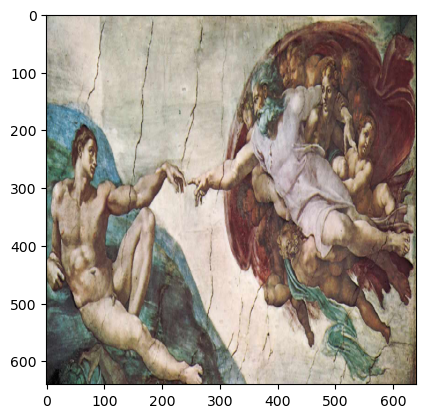

1/1 [==============================] - 0s 352ms/step
Predicted Class: Renaissance
[[0.00098818 0.40522456 0.00217306 0.00407571 0.10755324 0.44088975
  0.03909561]]


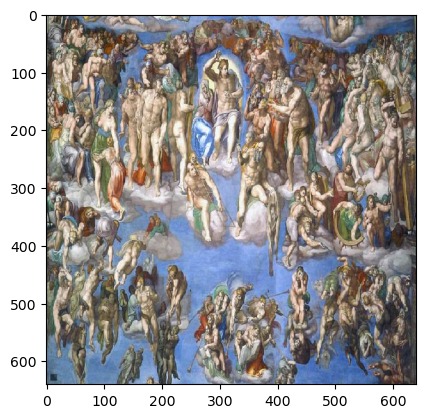

1/1 [==============================] - 0s 50ms/step
Predicted Class: Renaissance
[[8.2283834e-05 9.3984575e-04 1.4245126e-04 6.9169444e-05 2.3189696e-04
  9.9680030e-01 1.7338996e-03]]


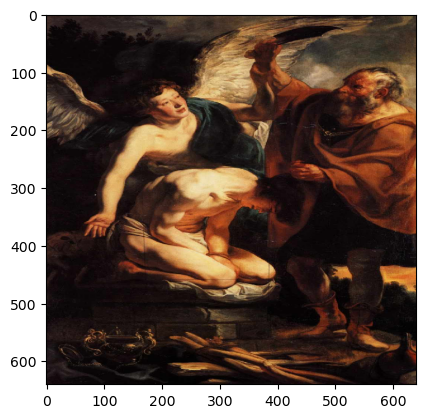

1/1 [==============================] - 0s 48ms/step
Predicted Class: Baroque
[[4.5932998e-06 9.3575215e-01 2.8834338e-05 5.0159019e-06 2.5819221e-03
  6.1221808e-02 4.0566261e-04]]


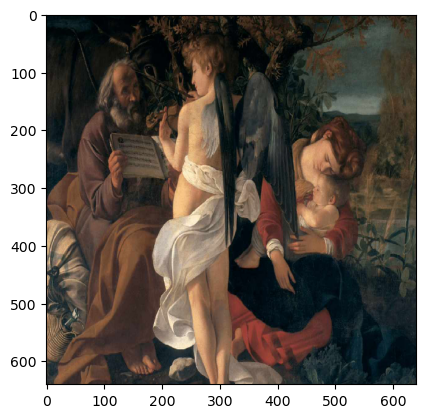

1/1 [==============================] - 0s 62ms/step
Predicted Class: Baroque
[[1.2165678e-04 4.9755782e-01 4.3216409e-04 2.0746764e-04 9.6389819e-03
  4.8929179e-01 2.7500242e-03]]


In [12]:
model = tf.keras.models.load_model("model filename")


dir_path = 'test dataset directory'
class_labels = ["Abstract","Baroque",  "Expressionism", "Impressionism", 
                 "Realism", "Renaissance", "Surrealism"]


for i in os.listdir(dir_path):
    img = image.load_img(os.path.join(dir_path, i), target_size=(640, 640))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X /= 255.0 
    X = np.expand_dims(X, axis=0)
    
    images = np.vstack([X])

    val = model.predict(images)
    
    predicted_class_index = np.argmax(val)
    
    predicted_class_label = class_labels[predicted_class_index]
    
    print("Predicted Class:", predicted_class_label)
    print(str(val))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 638, 638, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 319, 319, 16)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 319, 319, 16)      64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 317, 317, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 158, 158, 32)      0         
 g2D)                                                            
                                                        

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

num_classes = 6

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'test dataset directory',
    target_size=(640, 640),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

predictions = model.predict(test_generator)

predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_generator.classes

conf_matrix = confusion_matrix(true_labels, predicted_labels)

class_names = ["Baroque", "Expressionism", "Impressionism", 
              "Realism", "Renaissance", "Surrealism"]

conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Percentages)')
plt.show()


In [ ]:
from sklearn.metrics import classification_report



class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(class_report)